

# Belief propagation

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://static.thenounproject.com/png/542457-200.png" width="300px" height="300px" />

> In this class, we study an alternative class of algorithms to the Variable Elimination algorithm, which is the message passing class of algorithms.
>
> Although the Message Passing algorithms are closely related to Variable Elimination in some ways, they also offer us additional flexibility in how we do the summation and factor product steps. This means that we may (potentially) come up with a lower complexity in some cases.

> **Objetives:**
> - To study the cluster graphs and how to pass messages between them.
> - To describe the Belief Propagation algorithm algorithm.
> - To analyze the properties of the Belief Propagation algorithm.
> - To study the Belief Propagation algorihm in clique trees.

> **References:**
> - Probabilistic Graphical Models: Principles and Techniques, By Daphne Koller and Nir Friedman. Ch. 10.
> - Mastering Probabilistic Graphical Models Using Python, By Ankur Ankan and Abinash Panda. Ch. 3.
> - Probabilistic Graphical Models Specialization, offered through Coursera. Prof. Daphne Koller.


<p style="text-align:right;"> Imagen recuperada de: https://static.thenounproject.com/png/542457-200.png.</p>

___

> In the last class we studied how we can exploit the graphical structure to come up with an (Variable Elimination) algorithm that performs exact inference in an effective way.
>
> The main insight behind the VE algorithm is that the factorization of the distribution allows us to perform local operations on the factors.
>
> In this class, we exploit the same insight with a different class of algorithms.

As in the previous class, we assume that we are dealing with a set of factors we have a set of factors $\bar{\Phi}=\{\phi_1(\bar{X}_1), \dots, \phi_m(\bar{X}_m)\}$ over $\bar{X}$, that define an (unnormalized) measure:

$$\tilde{P}_{\bar{\Phi}}(\bar{X}) = \prod_{\phi_i\in\bar{\Phi}} \phi_i(\bar{X}_i).$$

# 1. Cluster Graph

## 1. Cluster graphs

We begin by defining the *cluster graphs*:

> *Definition.* A **cluster graph** $\mathcal{U}$ for a set of factors $\bar{\Phi}$ over $\bar{X}$ is an undirected graph, whose nodes, say $i$, are associated with a subset of variables, say $\bar{C}_i\subset\bar{X}$, which we call clusters.
> 
> **Family preservation property:** Moreover, each factor $\phi_k\in\bar{\Phi}$ must be associated one and only one cluster $\bar{C}_{\alpha(k)}$ such that $\mathrm{scope}[\phi_k]\subseteq \bar{C}_{\alpha(k)}$.
>
> Each edge between a pair of clusters $\bar{C}_i$ and $\bar{C}_j$ is associated with a **sepset** $\bar{S}_{ij}\subseteq \bar{C}_i\cap\bar{C}_j$.

**Example.** Let's consider the pairwise MN:

In [2]:
from IPython.display import Image

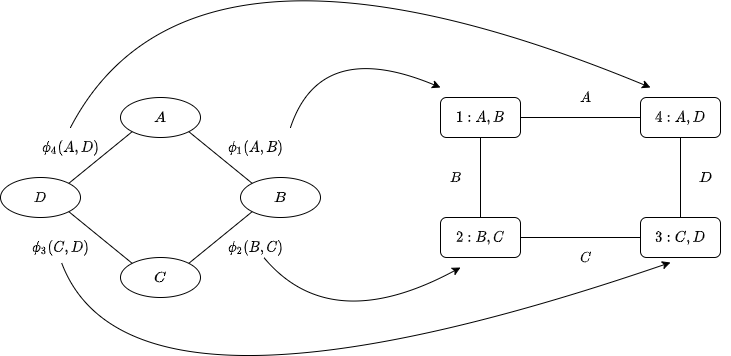

In [2]:
Image("figures/clusterGraph.png")

**Example.** Consider following set of factors:

$$\bar{\Phi}=\{\phi_1(A,B,C), \phi_2(B,C), \phi_3(B,D), \phi_4(D,E), \phi_5(B,E), \phi_6(B,D), \phi_7(B,D,F)\}.$$

Then, possible cluster graphs are ($\alpha(1)=1$, $\alpha(2)=2$, $\alpha(3)=2$, $\alpha(4)=5$, $\alpha(5)=4$, $\alpha(6)=3$, $\alpha(7)=3$):

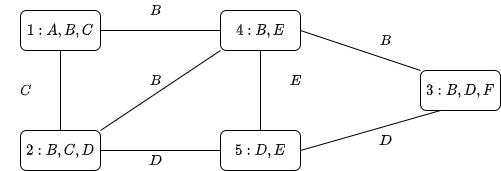

In [3]:
Image("figures/clusterGraph2.png")

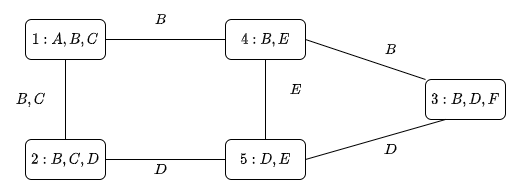

In [4]:
Image("figures/clusterGraph3.png")

- The idea behind the belief propagation algorithm is that clusters will "talk" to each other;
- They are going to try to convince each other that what they think about a variable is correct.

## 1.2. Belief propagation algorithm

Now that we know what a cluster graph is, we will describe the Belief Propagation algorithm:

1. Assign each factor $\phi_k \in \bar{\Phi}$ to a cluster $C_{\alpha(k)}$.

2. Construct initial potentials $\psi_i(\bar{C_i}) = \prod_{k: \alpha(k)=i} \phi_k(\bar{X}_k)$.

3. Initialize all messages $\delta_{ij}(\bar{S}_{ij})=1$.

4. Repeat:
   - Select edge (i,j) and pass message
   $$\delta_{ij}(\bar{S}_{ij}) = \sum_{\bar{C}_i\setminus\bar{S}_{ij}} \psi_i(\bar{C}_i) \prod_{k\in\mathcal{N}_i \setminus \{j\}} \delta_{ki}(\bar{S}_{ki}),$$
   where $\mathcal{N}_i$ are the set of neighboring nodes of node $i$.
   
   <font color=red>Explain</font>

5. Compute beliefs:
   
   $$\beta_i(\bar{C}_i) = \psi_i(\bar{C}_i) \prod_{k\in\mathcal{N}_i} \delta_{ki}(\bar{S}_{ki})$$

### Important

- This algorithm doesn't converge always.
- When it does, it's only approximate, in the general case.

## 1.3. Properties of cluster graphs

Until now, we know what the cluster graphs are, and how to pass messages between clusters to run the belief propagation algorithm.

However, we don't know how to construct cluster graphs given a PGM yet. To this end, let's examine some properties that cluster graphs need to satisfy in order to support message passing:

**1. Family preservation**

Given a set of factors $\bar{\Phi}$, we assign each factor $\phi_k\in\bar{\Phi}$ to one and only one cluster $\bar{C}_{\alpha(k)}$ such that $\mathrm{scope}[\phi_k]\subseteq \bar{C}_{\alpha(k)}$.

- *All the information is used only once.*

**2. Running intersection property**

For each pair of clusters $\bar{C}_i, \bar{C}_j$, and a variable $X \in \bar{C}_i \cap \bar{C}_j$, there exists a unique path between $\bar{C}_i$ and $\bar{C}_j$ for which all clusters and sepsets contain $X$.

- *The existence of such a path porevents the isolation of information about a variable*.
- *The uniqueness prevents self-reinforcement feedback loops*.

Equivalently: For any $X$, the set of clusters and sepsets that contain $X$ form a **tree**.

**Example.** Consider again the set of factors:

$$\bar{\Phi}=\{\phi_1(A,B,C), \phi_2(B,C), \phi_3(B,D), \phi_4(D,E), \phi_5(B,E), \phi_6(B,D), \phi_7(B,D,F)\}.$$

$\alpha(1)=1$, $\alpha(2)=2$, $\alpha(3)=2$, $\alpha(4)=5$, $\alpha(5)=4$, $\alpha(6)=3$, $\alpha(7)=3$.

Then, the following cluster graph satisfies both, the family preservation and the running intersection properties.

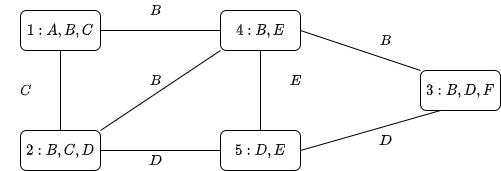

In [5]:
Image("figures/clusterGraph2.png")

What about this one?

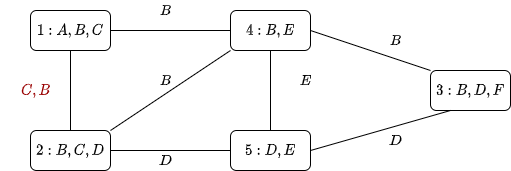

In [6]:
Image("figures/clusterGraph4.png")

Is it a valid cluster graph?

- No, because the running intersection property does not hold. For instance, taking clusters 1 and 2, and $B\in \bar{C}_1\cap \bar{C}_2$, there is not a unique path between clusters 1 and 2 such that all clusters and sepsets contain $B$ (paths: 1-2, 1-4-2).

And this one?

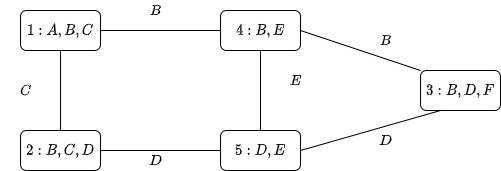

In [7]:
Image("figures/clusterGraph5.png")

Is it a valid cluster graph?

- No. Again, the running intersection property does not hold. This time, there does not exist a path between $\bar{C}_1$ and $\bar{C}_2$ such that all clusters and sepsets contain $B$.

**Bethe cluster graph**

This type of cluster graphs always satisfy both properties.

1. For each factor $\phi_k\in\bar{\Phi}$, assign a cluster $\bar{C}_k$ such that $\mathrm{scope}[\phi_k]\subseteq \bar{C}_k$.
2. For each variable $X_i$ assign a singleton cluster $\{X_i\}$.
3. Add an edge $\bar{C}_k - X_i$ if $X_i\in\bar{C}_k$.

For the example we were analyzing before (<font color=red>in the whiteboard, then show</font>):

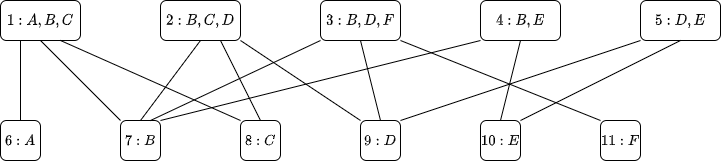

In [8]:
# clusterGraph6
Image("figures/clusterGraph6.png")

Although the correlations between factors is lost, the Bethe cluster graph provides an easy way to construct cluster graphs satisfying the properties of family preservation and running intersection.

## 1.4. Properties of belief propagation

Now, we turn our attention to some properties that will allow to study convergence of the belief propagation algorithm.

**1. Calibration**

Recall the pairwise MN:

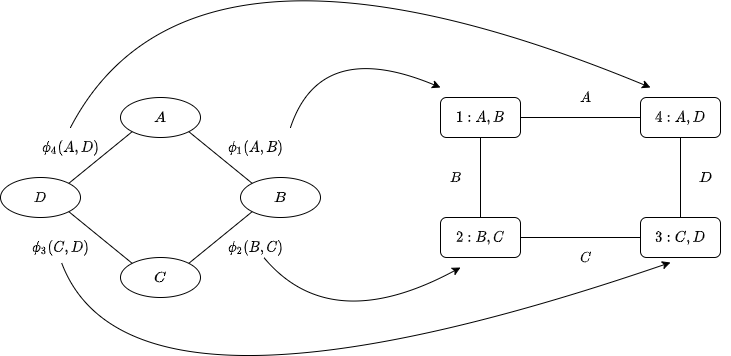

In [9]:
Image("figures/clusterGraph.png")

The cluster beliefs are defined as:

$$\beta_i(\bar{C}_i) = \psi_i(\bar{C}_i) \prod_{k\in\mathcal{N}_i}\delta_{ki}(\bar{S}_{ki})$$

For instance,

$$\beta_1(A,B) = \psi_1(A,B) \delta_{41}(A) \delta_{21}(B)$$

> *Definition.* A cluster graph is **calibrated** if every pair of adjacent clusters $\bar{C}_i, \bar{C}_j$ agree on their sepset $\bar{S}_{ij}$:
> 
> $$\sum_{\bar{C_i}\setminus\bar{S}_{ij}}\beta_i(\bar{C}_i) = \sum_{\bar{C_j}\setminus\bar{S}_{ij}}\beta_j(\bar{C}_j).$$

This is, the cluster graph is calibrated if the marginal beliefs agree.

**2. Convergence**

The convergence property refers to an *steady state achievement*.

> *Definition.* A cluster graph has attained **convergence** if all the messages at the next time step equal the messages at the previous time step:
>
> $$\delta_{ij}(\bar{S}_{ij}) = \delta_{ij}'(\bar{S}_{ij})$$

One important result is that **convergence implies calibration** (<font color=red>see in the whiteboard</font>)



To see this, first recall that

$$\delta_{ij}'(\bar{S}_{ij}) = \sum_{\bar{C}_i \setminus\bar{S}_{ij}} \psi_i(\bar{C}_i) \prod_{k\in\mathcal{N}_i\setminus\{j\}}\delta_{ki}(\bar{S}_{ki}) = \sum_{\bar{C}_i \setminus\bar{S}_{ij}} \frac{\beta_{ij}(\bar{C}_i)}{\delta_{ji}(\bar{S}_{ji})}.$$

Thus, assuming convergence:
$$\delta_{ij}(\bar{S}_{ij}) \delta_{ji}(\bar{S}_{ji}) = \sum_{\bar{C}_i \setminus\bar{S}_{ij}} \beta_{i}(\bar{C}_i).$$

Using the same sort of argument
$$\delta_{ji}(\bar{S}_{ji}) \delta_{ij}(\bar{S}_{ij}) = \sum_{\bar{C}_j \setminus\bar{S}_{ji}} \beta_{j}(\bar{C}_j).$$

Thus

$$\mu_{ij}(\bar{S}_{ij}) := \delta_{ij}(\bar{S}_{ij}) \delta_{ji}(\bar{S}_{ji}) = \sum_{\bar{C}_i \setminus\bar{S}_{ij}} \beta_{i}(\bar{C}_i) = \sum_{\bar{C}_j \setminus\bar{S}_{ji}} \beta_{j}(\bar{C}_j).$$


**3. Reparametrization**

This property state that there is no loss of information in the message passing process.

To see this, recall that:

$$\beta_i(\bar{C}_i) = \psi_i(\bar{C}_i) \prod_{k\in\mathcal{N}_i}\delta_{ki}(\bar{S}_{ki}),$$

and

$$\mu_{ij}(\bar{S}_{ij}) = \delta_{ij}(\bar{S}_{ij}) \delta_{ji}(\bar{S}_{ji}).$$

Then,

$$\frac{\prod_{i}\beta_i(\bar{C}_i)}{\prod_{i,j} \mu_{ij}(\bar{S}_{ij})} = \frac{\prod_{i}\psi_i(\bar{C}_i) \prod_{j\in\mathcal{N}_i}\delta_{ji}(\bar{S}_{ji})}{\prod_{i,j} \delta_{ij}(\bar{S}_{ij})} = \prod_{i}\psi_i(\bar{C}_i) = \tilde{P}_{\bar{\Phi}}(\bar{X}).$$

___
# 2. Belief Propagation in Clique Trees

We know now that in the general case, the belief propagation algorithm don't work always.

However, when applied over *clique trees*, the belief propagation algorithm has stronger performance guarantees:
- Faster convergence.
- Convergence to exact inference.

## 2.1. Message passing in trees

Consider the following chain:

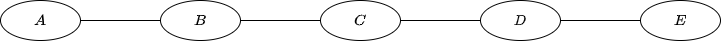

In [3]:
Image("figures/chain.png")

The following is a valid tree cluster graph for the above chain:

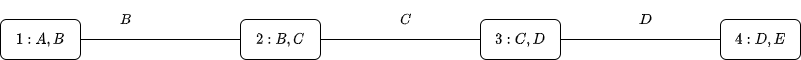

In [4]:
Image("figures/clusterGraphChain.png")

**How is the form of all the messages that will be passed over this tree cluster graph?**

<font color = red>See in the whiteboard, then show.</font>

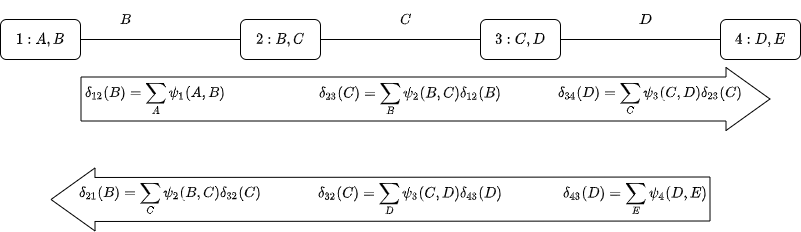

In [5]:
# clusterGraphChain2
Image("figures/clusterGraphChain2.png")

Thus, it is not hard to realize that after a single run of the belief propagation algorithm in both directions, the beliefs converge to the correct marginals.

For instance, consider cluster 3:

$$\begin{align}
\beta_3(C,D) & = \psi_3(C,D) \delta_{23}(C) \delta_{43}(D) \\
             & = \psi_3(C,D) \sum_{B} \psi_2(B,C) \delta_{12}(B) \sum_{E} \psi_4(D,E)\\
             & = \psi_3(C,D) \sum_{B} \psi_2(B,C) \sum_{A} \psi_1(A,B) \sum_{E} \psi_4(D,E)\\
             & = \tilde{P}_{\bar{\Phi}}(C,D)
\end{align}$$

## 2.2. Clique trees

The behavior in the chain cluster graph is also attained by *clique trees* structures.

> *Definition.* A **clique tree** is an undirected tree such that:
>
> 1. Its nodes are clusters $\bar{C}_i \subset \bar{X}$, which correspond to *cliques* in the original graphical model.
> 2. The edges between $\bar{C}_i$ and $\bar{C}_j$ are associated with the sepset $\bar{S}_{ij}=\bar{C}_i \cap \bar{C}_j$.

What is a *clique*?

> *Definition.* A **clique** is a complete subgraph. This is, a portion of the complete graph where every two nodes are connected by some edge.

When talking about cliques, we always consider the **induced undirected network** (Section 9.4.2.3, page 308).

Of course, since clique trees are a special case of cluster graphs, they should satisfy both, the family preservation and the running intersection properties.

The **running intersection property for clique trees** can be rewritten as:

- For each pair of clusters $\bar{C}_i, \bar{C}_j$ and a variable $X\in\bar{C}_i \cap \bar{C}_j$, in the unique path between $\bar{C}_i$ and $\bar{C}_j$, all clusters and sepsets contain $X$.

**Example.**

Consider the extended student network:

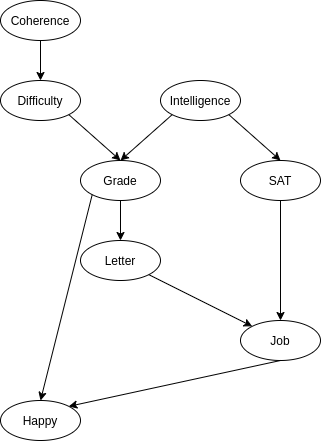

In [6]:
Image("figures/extendedStudent.png")

The induced graph for the bove Bayesian network is:

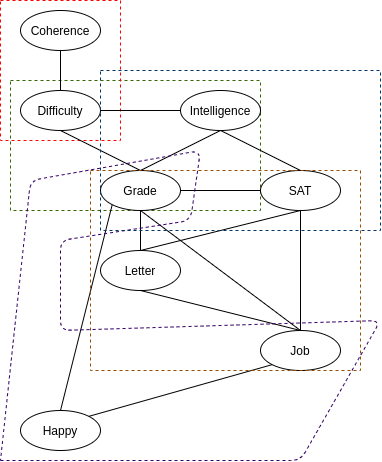

In [7]:
Image("figures/extendedStudentInduced.png")

Hence, a valid clique tree for this model is:

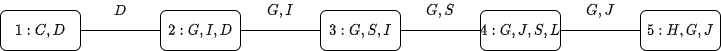

In [8]:
Image("figures/extendedStudentCliqueTree.png")

What is the form of the messages?

### Running intersection property implies correctness

- If a variable $X$ is marginalized (eliminated) when we pass the message $\delta_{ij}$, then $X$ does not appear in the $\bar{C}_j$ side of the clique tree.

- So, in this case, the computation of the **belief propagation algorithm is a variant of the variable elimination algorithm**, and the resulting beliefs are guaranteed to be correct marginals of $\tilde{P}_{\bar{\Phi}}$.

## 2.3. Clique tree algorithm computation

Let's consider the chain example:

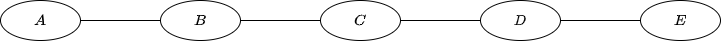

In [9]:
Image("figures/chain.png")

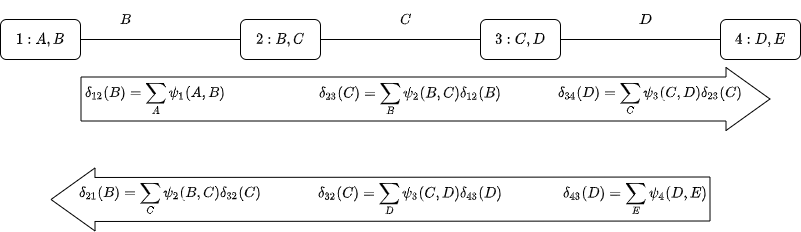

In [10]:
Image("figures/clusterGraphChain2.png")

One can note some things:
1. Once you compute $\delta_{12}$, it never changes (instant convergence).

2. For $\delta_{23}$, wait for $\delta_{12}$, then calculate and you get convergence.

3. For $\delta_{34}$, wait for $\delta_{23}$, then calculate and you get convergence.

4. The same happens in the opposite direction.

That is why this is known as **forward-backward algorithm**:

- Once $\bar{C}_i$ receives a final message from all neighbors, except $\bar{C}_j$, then $\delta_{ij}(\bar{S}_{ij})$ is also final.

- Messages from leaves of the tree are immediately final.

- If messages are passed in the right order, you only need to pass $2(k-1)$ messages, where $k$ is the number of cluster.

**Thus, you can compute the marginals over all variables at only twice the cost of one variable elimination over all variables.**

___

How to use belief propagation algorithm in pgmpy?

Restaurant example

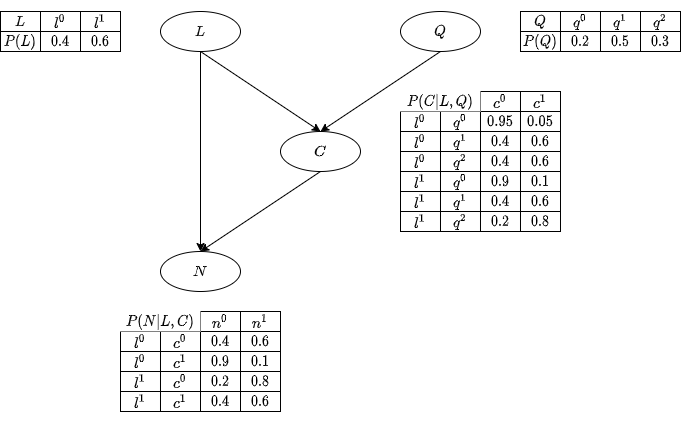

In [11]:
Image("figures/restaurant.png")

In [12]:
# Import pgmpy.models.BayesianModel
from pgmpy.models import BayesianModel

In [13]:
# Import pgmpy.factors.discrete.TabularCPD
from pgmpy.factors.discrete import TabularCPD

In [14]:
# Define model skeleton
restaurant = BayesianModel([('L', 'C'), ('Q', 'C'), ('L', 'N'), ('C', 'N')])

In [15]:
# Define CPDs
P_L = TabularCPD(variable='L',
                 variable_card=2,
                 values=[[0.4], [0.6]])
P_Q = TabularCPD(variable='Q',
                 variable_card=3,
                 values=[[0.2], [0.5], [0.3]])
P_CgivenLQ = TabularCPD(variable='C',
                        evidence=['L', 'Q'],
                        variable_card=2,
                        evidence_card=[2, 3],
                        values=[[0.95, 0.4, 0.4, 0.9, 0.4, 0.2],
                                [0.05, 0.6, 0.6, 0.1, 0.6, 0.8]])
P_NgivenLC = TabularCPD(variable='N',
                        evidence=['L', 'C'],
                        variable_card=2,
                        evidence_card=[2, 2],
                        values=[[0.4, 0.9, 0.2, 0.4],
                                [0.6, 0.1, 0.8, 0.6]])

In [16]:
# Attach CPDs to the model
restaurant.add_cpds(P_L, P_Q, P_CgivenLQ, P_NgivenLC)

In [17]:
# Check if the model is correctly defined
restaurant.check_model()

True

In [19]:
# Get a valid clique tree
clique_tree = restaurant.to_junction_tree()

In [20]:
# Type
type(clique_tree)

pgmpy.models.JunctionTree.JunctionTree

In [21]:
# Nodes
clique_tree.nodes

NodeView((('C', 'L', 'N'), ('C', 'L', 'Q')))

In [24]:
# Edges
clique_tree.edges

EdgeView([(('C', 'L', 'N'), ('C', 'L', 'Q'))])

In [25]:
# Import pgmpy.inference.BeliefPropagation
from pgmpy.inference import BeliefPropagation

In [26]:
# Create inference object
belief_propagation = BeliefPropagation(restaurant)

In [27]:
# Calibrate
belief_propagation.calibrate()

In [29]:
# Get beliefs
beliefs = belief_propagation.get_clique_beliefs()

In [34]:
print(beliefs[('C', 'L', 'N')])

+------+------+------+--------------+
| C    | L    | N    |   phi(C,L,N) |
+======+======+======+==============+
| C(0) | L(0) | N(0) |       0.0816 |
+------+------+------+--------------+
| C(0) | L(0) | N(1) |       0.1224 |
+------+------+------+--------------+
| C(0) | L(1) | N(0) |       0.0528 |
+------+------+------+--------------+
| C(0) | L(1) | N(1) |       0.2112 |
+------+------+------+--------------+
| C(1) | L(0) | N(0) |       0.1764 |
+------+------+------+--------------+
| C(1) | L(0) | N(1) |       0.0196 |
+------+------+------+--------------+
| C(1) | L(1) | N(0) |       0.1344 |
+------+------+------+--------------+
| C(1) | L(1) | N(1) |       0.2016 |
+------+------+------+--------------+


In [37]:
print(beliefs[('C', 'L', 'Q')])

+------+------+------+--------------+
| C    | L    | Q    |   phi(C,L,Q) |
+======+======+======+==============+
| C(0) | L(0) | Q(0) |       0.0760 |
+------+------+------+--------------+
| C(0) | L(0) | Q(1) |       0.0800 |
+------+------+------+--------------+
| C(0) | L(0) | Q(2) |       0.0480 |
+------+------+------+--------------+
| C(0) | L(1) | Q(0) |       0.1080 |
+------+------+------+--------------+
| C(0) | L(1) | Q(1) |       0.1200 |
+------+------+------+--------------+
| C(0) | L(1) | Q(2) |       0.0360 |
+------+------+------+--------------+
| C(1) | L(0) | Q(0) |       0.0040 |
+------+------+------+--------------+
| C(1) | L(0) | Q(1) |       0.1200 |
+------+------+------+--------------+
| C(1) | L(0) | Q(2) |       0.0720 |
+------+------+------+--------------+
| C(1) | L(1) | Q(0) |       0.0120 |
+------+------+------+--------------+
| C(1) | L(1) | Q(1) |       0.1800 |
+------+------+------+--------------+
| C(1) | L(1) | Q(2) |       0.1440 |
+------+----

In [38]:
# Perform query
print(belief_propagation.query(variables=['N']))

Eliminating: L: 100%|██████████| 2/2 [00:00<00:00, 355.39it/s]

+------+----------+
| N    |   phi(N) |
+======+==========+
| N(0) |   0.4452 |
+------+----------+
| N(1) |   0.5548 |
+------+----------+


___

## 2.4. Clique trees and variable elimination

In the variable elimination algorithm we have:

1. Each steps creates a factor $\lambda_k$ through factor product.

2. A variable is eliminated in $\lambda_k$ to generate the new factor $\tau_k$.

3. $\tau_k$ is used in the computation of other factors $\lambda_j$.

From a clique tree perspective:

1. The intermediate factors $\lambda_k$ are the "cliques".

2. $\tau_k$ are "messages" generated by the clique $\lambda_k$ and transmitted to another clique $\lambda_j$.

Thus, the variable elimination algorithm defines the clique tree!

- Define a cluster $\bar{C}_i$ for each factor $\lambda_i$ used in the computation.

- Draw an edge $\bar{C}_i - \bar{C}_j$ if the factor generated from $\lambda_i$ is used in the computation of $\lambda_j$.

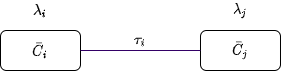

In [39]:
Image("figures/cliqueTreeVE.png")

This clique tree satisfies both, the family preserving property and the running intersection property.

**Example**

For the restaurant example of the last class:

$$P(L,Q,C,N)= \phi_L(L)\phi_Q(Q)\phi_C(C,L,Q)\phi_N(N,L,C).$$

1. Eliminate $Q$: $\tau_1(C,L) = \sum_{Q} \underbrace{\phi_Q(Q) \phi_C(C,L,Q)}_{\lambda_1(C,L,Q)}$.

2. Eliminate $C$: $\tau_2(N,L) = \sum_{C} \underbrace{\phi_N(N,L,C)\tau_1(C,L)}_{\lambda_2(N,L,C)}$.

3. Eliminate $L$: $\tau_3(N) = \sum_{L} \underbrace{\phi_L(L)\tau_2(N,L)}_{\lambda_3(N,L)}$.

4. Eliminate $N$: $\tau_4() = \sum_{N} \tau_3(N)$.

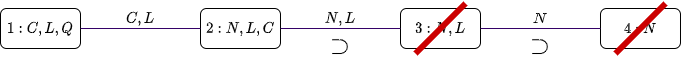

In [40]:
Image("figures/cliqueTreeVE2.png")

Remove redundant cliques: variables that are subsets of adjacent cliques.

# Announcements

## Quiz the next class.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>